Загрузка данных...
Размер обучающих данных: (25000, 200)
Размер тестовых данных: (25000, 200)
Обучение модели...
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 173s 217ms/step - accuracy: 0.7205 - loss: 0.5354 - val_accuracy: 0.8250 - val_loss: 0.4152
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 177s 227ms/step - accuracy: 0.8511 - loss: 0.3492 - val_accuracy: 0.8391 - val_loss: 0.3775
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 210ms/step - accuracy: 0.8713 - loss: 0.3138 - val_accuracy: 0.8467 - val_loss: 0.3692

Оценка модели на тестовых данных:
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8443 - loss: 0.3762
Точность на тестовых данных: 0.8467199802398682


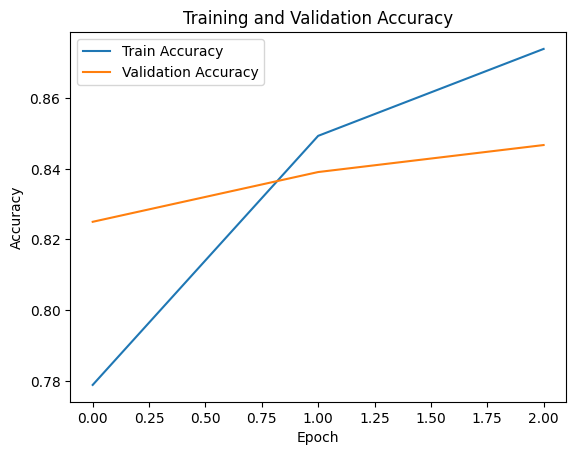


Введите текст для анализа тональности:


In [ ]:
# Импортируем необходимые библиотеки
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Шаг 1: Загрузка готового датасета IMDB
# Датасет содержит отзывы о фильмах и метки (0 - негативный, 1 - позитивный)
max_features = 10000  # Количество слов для анализа
max_len = 200  # Ограничение длины текста

print("Загрузка данных...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Шаг 2: Подготовка данных (padding)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print("Размер обучающих данных:", x_train.shape)
print("Размер тестовых данных:", x_test.shape)

# Шаг 3: Создание модели нейронной сети
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=max_len),  # Векторное представление слов
    tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),  # Рекуррентный слой LSTM
    tf.keras.layers.Dense(1, activation='sigmoid')  # Слой для классификации
])

# Компиляция модели
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Шаг 4: Обучение модели
print("Обучение модели...")
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=3,
                    validation_data=(x_test, y_test))

# Шаг 5: Оценка модели
print("\nОценка модели на тестовых данных:")
score = model.evaluate(x_test, y_test, batch_size=32)
print("Точность на тестовых данных:", score[1])

# Шаг 6: Визуализация обучения
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Шаг 7: Предсказание тональности текста
# Функция для предсказания тональности на простом тексте
word_index = imdb.get_word_index()

def encode_text(text):
    words = text.lower().split()
    encoded = [word_index.get(word, 0) for word in words]
    return sequence.pad_sequences([encoded], maxlen=max_len)

def predict_sentiment(text):
    encoded_text = encode_text(text)
    prediction = model.predict(encoded_text)[0][0]
    return "Positive" if prediction > 0.5 else "Negative"

# Пример ввода
print("\nВведите текст для анализа тональности:")
user_input = input()
print("Результат анализа:", predict_sentiment(user_input))
